# Module 2

# Talluri Surya Teja
# 15EE35028

## Streaming of live images

In [ ]:
import cv2

video_capture = cv2.VideoCapture(0)

i = 0

while True:
    _, frame = video_capture.read()
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

- cv2.VideoCapture(0) helps in taking source as webcam. different numbers represent different sources of videos
- video_capture.read() returns frame and a bool of weather its reading correctly
- video_capture.release() stops capturing and closes camera
- cv2.waitKey(1) & 0xFF == ord('q') helps in breaking if we press q

## Face detection using Haar Cascade

In [ ]:
import cv2

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return frame

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)

i = 0

while True:
    _, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

 - 'haarcascade_frontalface_default.xml' is the file for haar cascade model
 - face_cascade.detectMultiScale(gray, 1.3, 5) faces with given threshold..... input should be a gray image
 - after that loop over all detected faces and mark them and return the frama for displaying

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Here we will work with face detection. Initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then we need to extract features from it. For this, haar features shown in below image are used. They are just like our convolutional kernel. Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle.

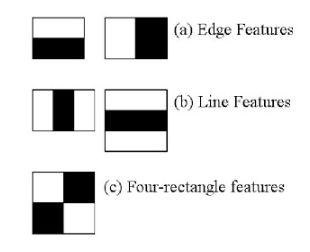

Now all possible sizes and locations of each kernel is used to calculate plenty of features. (Just imagine how much computation it needs? Even a 24x24 window results over 160000 features). For each feature calculation, we need to find sum of pixels under white and black rectangles. To solve this, they introduced the integral images. It simplifies calculation of sum of pixels, how large may be the number of pixels, to an operation involving just four pixels. Nice, isn't it? It makes things super-fast.

But among all these features we calculated, most of them are irrelevant. For example, consider the image below. Top row shows two good features. The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. The second feature selected relies on the property that the eyes are darker than the bridge of the nose. But the same windows applying on cheeks or any other place is irrelevant. So how do we select the best features out of 160000+ features? It is achieved by Adaboost.
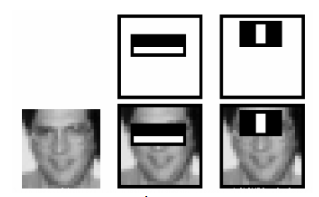
For this, we apply each and every feature on all the training images. For each feature, it finds the best threshold which will classify the faces to positive and negative. But obviously, there will be errors or misclassifications. We select the features with minimum error rate, which means they are the features that best classifies the face and non-face images. (The process is not as simple as this. Each image is given an equal weight in the beginning. After each classification, weights of misclassified images are increased. Then again same process is done. New error rates are calculated. Also new weights. The process is continued until required accuracy or error rate is achieved or required number of features are found).

# Face log

In [ ]:
import cv2

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect(gray, frame, step=50, log = False):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        if log and i%step ==0 and i//step<500 :
            cv2.imwrite('suprise/face'+str((i//step)+1)+'.jpg', frame[y:y+h, x:x+w])

    return frame

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)

i = 0

while True:
    _, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame, step = 1, log = True)
    cv2.imshow('Video', canvas)
    i += 1

    if cv2.waitKey(1) & 0xFF == ord('q') or i>500:
        break

video_capture.release()
cv2.destroyAllWindows()

- detect(gray, frame, step=50, log = True) helps in saving logs after every step ms
- cv2.imwrite is used to save images
- frame[y:y+h, x:x+w] gives the portion of array of frame with detected face using haar cascade